In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [29]:
TSLA = yf.download("TSLA")
TSLA

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2022-12-08,172.199997,175.199997,169.059998,173.440002,173.440002,97624500
2022-12-09,173.839996,182.500000,173.360001,179.050003,179.050003,104746600
2022-12-12,176.100006,177.369995,167.520004,167.820007,167.820007,109794500


In [30]:
TSLA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [31]:
TSLA.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-08,172.199997,175.199997,169.059998,173.440002,173.440002,97624500
2022-12-09,173.839996,182.500000,173.360001,179.050003,179.050003,104746600
2022-12-12,176.100006,177.369995,167.520004,167.820007,167.820007,109794500
2022-12-13,174.869995,175.050003,156.910004,160.949997,160.949997,175862700
2022-12-14,159.250000,161.619995,155.309998,156.800003,156.800003,140431500


In [33]:
TSLA.shape

(3139, 6)

In [34]:
TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3.139000e+03
mean,58.594389,59.904580,57.151675,58.552138,58.552138,9.332156e+07
std,95.715355,97.913190,93.237035,95.591741,95.591741,8.168317e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,8.841667,9.011333,8.505333,8.721334,8.721334,4.216650e+07
50%,16.180000,16.445999,15.913333,16.185333,16.185333,7.577850e+07
75%,24.326333,24.745000,23.913667,24.240666,24.240666,1.170380e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [35]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3139 entries, 2010-06-29 to 2022-12-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3139 non-null   float64
 1   High       3139 non-null   float64
 2   Low        3139 non-null   float64
 3   Close      3139 non-null   float64
 4   Adj Close  3139 non-null   float64
 5   Volume     3139 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 171.7 KB


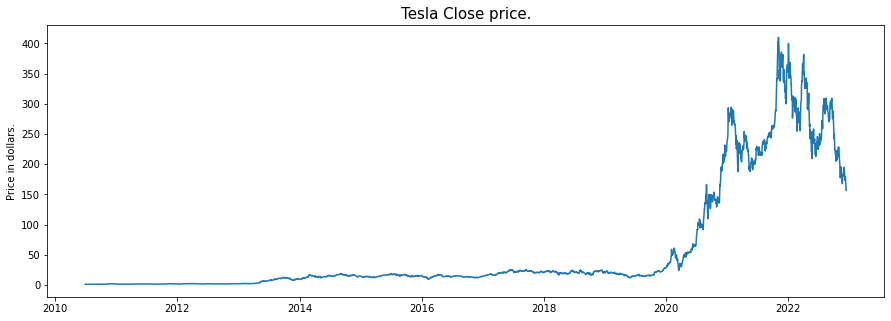

In [37]:
plt.figure(figsize=(15,5))
plt.plot(TSLA['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [38]:
TSLA[TSLA['Close'] == TSLA['Adj Close']].shape

(3139, 6)

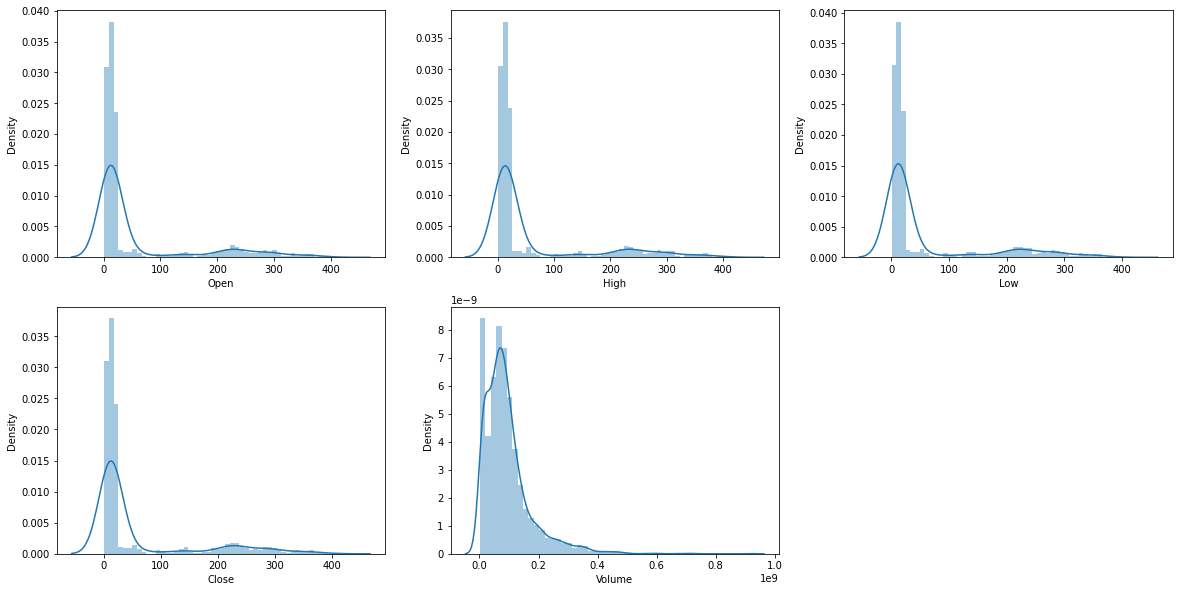

In [42]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(TSLA[col])
plt.show()

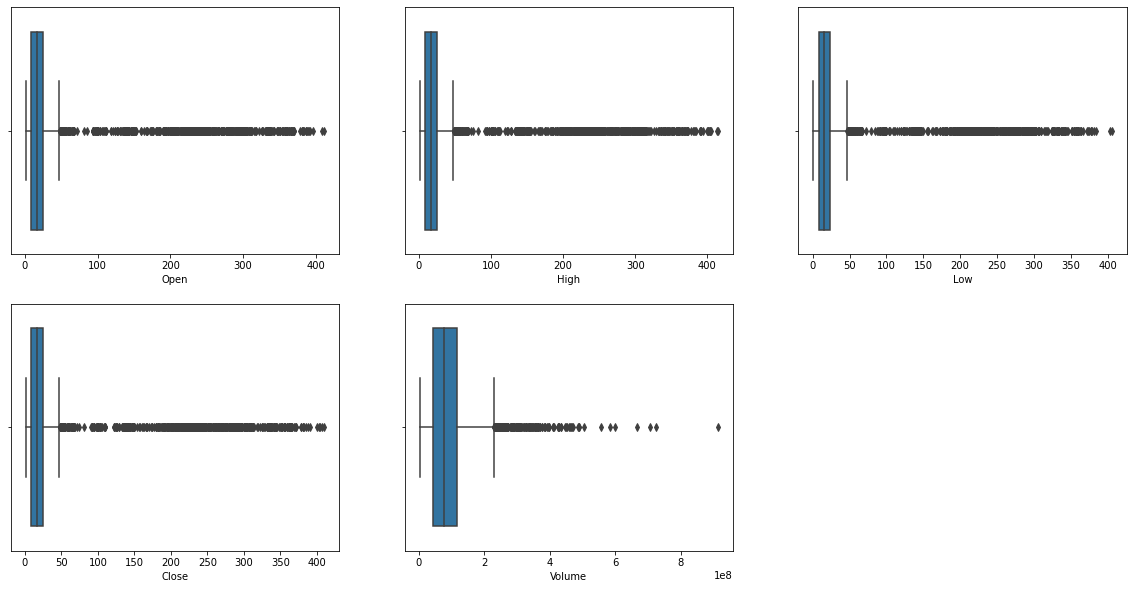

In [44]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(TSLA[col])
plt.show()

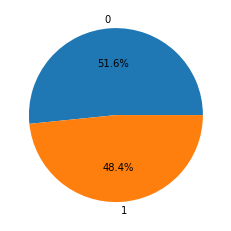

In [59]:
TSLA['open-close'] = TSLA['Open'] - TSLA['Close']
TSLA['low-high'] = TSLA['Low'] - TSLA['High']
TSLA['target'] = np.where(TSLA['Close'].shift(-1) > TSLA['Close'], 1, 0)
plt.pie(TSLA['target'].value_counts().values,
            labels=[0, 1], autopct='%1.1f%%')
plt.show()